<a href="https://www.kaggle.com/code/larsmagnusson/itf31519-random-forest-gradient-boosting?scriptVersionId=106720445" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# Load dataset
dataset = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
from sklearn.model_selection import train_test_split

# Split into training and test data (75/25)
train_X, test_X, train_y, test_y = train_test_split(dataset.drop('quality', axis=1), dataset['quality'])

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Train and test a simple decision tree on the data for benchmark purposes
tree_scores = cross_val_score(DecisionTreeClassifier(), train_X, train_y)

# We are using cross-validation, so the overfitted results are "hidden", we only
# get an estimate for the performance based on the hold-out sets.
(tree_scores.mean(), tree_scores.std())

(0.5821722454672246, 0.01646194727064878)

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train and test random forest classifier with default parameters
rf_scores = cross_val_score(RandomForestClassifier(), train_X, train_y)
(rf_scores.mean(), rf_scores.std())

(0.641363319386332, 0.01871144554851273)

In [6]:
from sklearn.ensemble import AdaBoostClassifier

# Train and test an AdaBoost classifier with default parameters
ada_scores = cross_val_score(AdaBoostClassifier(), train_X, train_y)

(ada_scores.mean(), ada_scores.std())

(0.4645990237099024, 0.10535142617814373)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# Train and test an GradientBoosting classifier with default parameters
grad_scores = cross_val_score(GradientBoostingClassifier(), train_X, train_y)

(grad_scores.mean(), grad_scores.std())

(0.6272036262203626, 0.027269964755184187)

In [8]:
from sklearn.model_selection import GridSearchCV

# Test a range of different values for n_estimators for a RandomForestClassifier
rf_params = {'n_estimators':list(range(10,201,10))}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params)
rf_grid.fit(train_X, train_y)

rf_results = pd.DataFrame(rf_grid.cv_results_)

In [9]:
# Test a range of different values for n_estimators for a GradientBoosting classifier
grad_params = {'n_estimators':list(range(10,201,10))}
grad_grid = GridSearchCV(GradientBoostingClassifier(), rf_params)
grad_grid.fit(train_X, train_y)

grad_results = pd.DataFrame(grad_grid.cv_results_)

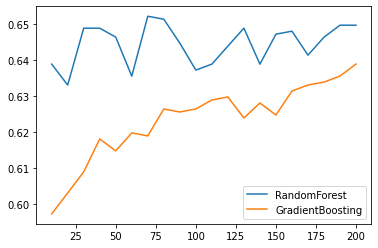

In [10]:
import matplotlib.pyplot as plt

# Plot the results for both random forest and gradient boosting in a single figure
plt.plot(rf_results['param_n_estimators'], rf_results['mean_test_score'], label='RandomForest')
plt.plot(grad_results['param_n_estimators'], grad_results['mean_test_score'], label='GradientBoosting')
plt.legend()
plt.show()